#   <font color=green>The Sparks Foundation - GRIP - Data Science and Business Analytics - March 2022 

## <font color=green>TASK 1 : Prediction using supervised ML

### <span style='background :yellow' > Author: Mukul Dev Mahato </span> 

### Problem : 
* Predict the percentage of an student based on the no. of study hours. 
* What will be predicted score if a student studies for 9.25 hrs/ day?

***Importing the necssary libraries***

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Importing the csv dataset as a pandas dataframe***

In [66]:
#Importing data from remote link.

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### <font color='green'>Lets Visualize the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

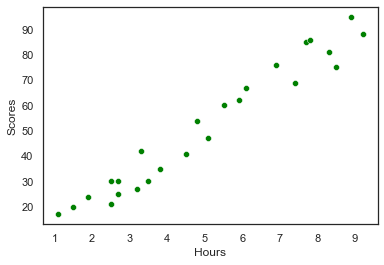

In [41]:
sns.scatterplot(data=df, x="Hours", y="Scores", color = 'green')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

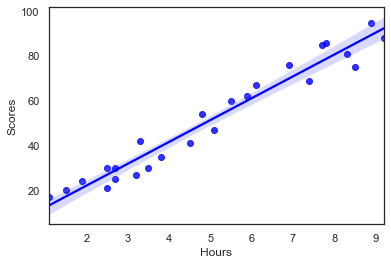

In [42]:
sns.regplot(data=df, x="Hours", y="Scores", color = 'blue')

#### <span style='background :yellow' >From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### <font color = 'green'>Lets Prepare the Data.

***The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).***

In [43]:
X = df[['Hours']]
y = df['Scores']

### <font color='green'>Train-Test Split

***The next step is to split this data into training and test sets.***

In [44]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### <font color= 'green'>Training the Algorithm / Model Building 

***We have split our data into training and testing sets, and now is finally the time to train our algorithm.***

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_y)

print("Model Training Complete")

Model Training Complete


### <font color='green'>Making Predictions

***Now that we have trained our model, it's time to make some predictions.***

In [46]:
pred_y = regressor.predict(val_X)
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


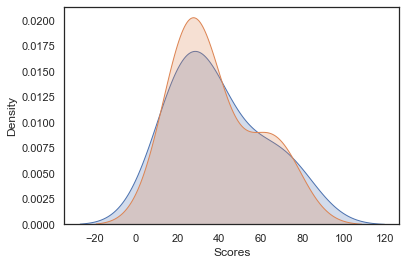

In [49]:
## Actual vs Predicted distribution plot 


sns.kdeplot(pred_y,label="Predicted", shade=True);
sns.kdeplot(data=val_y, label="Actual", shade=True);

In [51]:
print('Train accuracy: ', regressor.score(train_X, train_y),'\nTest accuracy : ',
      regressor.score(val_X, val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


###  <font color='green'>Predict percent for custom input value for hours 
### <font color='green'>Q.What will be predicted score if a student studies for 9.25 hrs/ day? 


In [58]:
h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score of', s[0])

A student who studies  9.25  hours is estimated to score of 93.89272889341655
